# Введение в анализ данных

## Семинар 3. Продолжение знакомства с библиотеками для анализа данных

### Полезная информация
 - [Страница курса на вики](http://wiki.cs.hse.ru/Майнор_Интеллектуальный_анализ_данных/Введение_в_анализ_данных)
 - [Страница семинаров на вики](http://wiki.cs.hse.ru/Майнор_Интеллектуальный_анализ_данных/Введение_в_анализ_данных/ИАД-11,12)
 - [Таблица с оценками](https://docs.google.com/spreadsheets/d/1jZL_-ELf0Ogj2XHa6VVbkg8vrInycv2-Z9UR5keLDfM/edit?usp=sharing)
 - Почта курса *hse.minor.dm@gmail.com* (Формат темы: "[ИАД-NN] - Вопрос - Фамилия Имя Отчество")
 - Виртуальная машина для майнора (подробности см. на странице семинара)
 - **Подписаться на рассылку**: написать пустое письмо на hse-minor-datamining-2+subscribe@googlegroups.com
 - Первое ДЗ!

### Что было в прошлый раз

**Типы ответов**
 - вещественные ответы (регрессия)
 - конечное число ответов (классификация: бинарная/многоклассовая/пересекающиеся классы)
 - временной ряд
 - ранжирование (?)
 - отсутствие ответа (кластеризация)
 
**Типы признаков**
 - бинарный ({0, 1})
 - вещественный
 - категориальный (неупорядоченное конечное множество)
 - порядковый (упорядоченное конечное множество)
 - множественные признаки
 
**Обобщающая способность**
 - недообучение
 - переобучение
 
**Задачи анализа данных**
 - медицинская диагностика: объект — пациент, ответ — диагноз, классификация с пересекающимися классами; признаки: бинарные (пол), порядковые (тяжесть состояния), вещественные (вес)
 - кредитный скоринг
 - предсказание оттока клиентов
 - стоимость недвижимости
 - прогнозированние продаж (временные ряды)

### Numpy

In [1]:
import numpy as np

In [4]:
A = np.arange(15).reshape(3, 5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

Транспонирование матрицы

In [5]:
A.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [6]:
B = np.arange(6).reshape(2, 3)
B

array([[0, 1, 2],
       [3, 4, 5]])

Конкатенация:

In [8]:
np.concatenate((A.T, B), axis=0)

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [10]:
np.concatenate((A, B.T), axis=1)

array([[ 0,  1,  2,  3,  4,  0,  3],
       [ 5,  6,  7,  8,  9,  1,  4],
       [10, 11, 12, 13, 14,  2,  5]])

В чем разница между *concatenate* и *vstack*/*hstack*? [Stackoverflow!](http://stackoverflow.com/questions/33356442/when-should-i-use-hstack-vstack-vs-append-vs-concatenate-vs-column-stack)

Изменение размера матрицы (количество элементов должно оставаться тем же)

In [13]:
np.arange(6).reshape(2, 3)

array([[0, 1, 2],
       [3, 4, 5]])

Если задать один один из параметров равным -1, то он будет вычислен автоматически

In [14]:
np.arange(6).reshape(2, -1)

array([[0, 1, 2],
       [3, 4, 5]])

Вытягивание в вектор

In [16]:
np.ravel(A)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [18]:
np.ravel(A, order='F')

array([ 0,  5, 10,  1,  6, 11,  2,  7, 12,  3,  8, 13,  4,  9, 14])

In [19]:
?np.ravel

[flatten vs ravel](http://stackoverflow.com/questions/28930465/what-is-the-difference-between-flatten-and-ravel-functions-in-numpy)

Логические операции

In [138]:
A = np.arange(10).reshape(2, 5)
A

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

Применить одно условие достаточно просто

In [135]:
A[A > 4]

array([5, 6, 7, 8, 9])

Если нужно сделать несколько условий?

In [44]:
A[A > 4 and A < 6]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [45]:
A[np.logical_and(A > 4, A < 8)]

array([5])

Чтобы нейти все ненулевые элементы матрицы:

In [136]:
A.nonzero()

(array([0, 0, 0, 0, 1, 1, 1, 1, 1]), array([1, 2, 3, 4, 0, 1, 2, 3, 4]))

In [48]:
A[A.nonzero()]

array([1, 2, 3, 4, 5])

In [137]:
?np.nonzero

#### Matrix
Ещё один тип данных в NumPy — matrix. Является производным классом от ndarray, в связи с чем можно использовать все методы и функции, применимые к array. Однако:
 - matrix — строго 2мерные;
 - матричное умножение осуществляется через * (в отличие от dot для array)

In [29]:
A = np.arange(0, 4).reshape(2, 2)
B = np.arange(3, 7).reshape(2, 2)

In [30]:
A * B

array([[ 0,  4],
       [10, 18]])

In [31]:
a = np.matrix(A)
b = np.matrix(B)

In [32]:
a * b

matrix([[ 5,  6],
        [21, 26]])

### Pandas
 
 ![](http://i.imgur.com/PADRo1K.png)
 
 
 - [Working with missing data](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('titanic.csv')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [5]:
data.shape

(891, 12)

In [7]:
data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [139]:
data['Pclass'].unique()

array([3, 1, 2])

In [11]:
data[['Survived', 'Pclass']][:10]

Survived  Pclass
0         0       3
1         1       1
2         1       3
3         1       1
4         0       3
5         0       3
6         0       1
7         0       3
8         1       3
9         1       2

Если хочется делать неожиданные срезы по столбцам и строкам одновременно, можно воспользоваться методом iloc: он работает с целочисленной индексацией

In [13]:
data.iloc[1:3, 1:3]

Survived  Pclass
1         1       1
2         1       3

#### Группировка данных

Группировка позволяет объединять данные и считать по ним общую статистику.
Для группировки данных есть метод groupby, который возвращает специальный объект. 

In [15]:
data.groupby('Sex')

In [18]:
data.groupby('Pclass')['Fare'].describe()

Pclass       
1       count    216.000000
        mean      84.154687
        std       78.380373
        min        0.000000
        25%       30.923950
        50%       60.287500
        75%       93.500000
        max      512.329200
2       count    184.000000
        mean      20.662183
        std       13.417399
        min        0.000000
        25%       13.000000
        50%       14.250000
        75%       26.000000
        max       73.500000
3       count    491.000000
        mean      13.675550
        std       11.778142
        min        0.000000
        25%        7.750000
        50%        8.050000
        75%       15.500000
        max       69.550000
dtype: float64

In [21]:
data.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
dtype: int64

In [28]:
data.groupby(['Sex', 'Pclass'])['Survived'].value_counts()

Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
dtype: int64

In [29]:
data.groupby(['Pclass', 'Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
dtype: int64

### Объединение датафреймов

In [27]:
male = data[data['Sex'] == 'male']
female = data[data['Sex'] == 'female']

In [35]:
pd.concat([male, female]).head()

PassengerId  Survived  Pclass                            Name   Sex  Age  \
0            1         0       3         Braund, Mr. Owen Harris  male   22   
4            5         0       3        Allen, Mr. William Henry  male   35   
5            6         0       3                Moran, Mr. James  male  NaN   
6            7         0       1         McCarthy, Mr. Timothy J  male   54   
7            8         0       3  Palsson, Master. Gosta Leonard  male    2   

   SibSp  Parch     Ticket     Fare Cabin Embarked  
0      1      0  A/5 21171   7.2500   NaN        S  
4      0      0     373450   8.0500   NaN        S  
5      0      0     330877   8.4583   NaN        Q  
6      0      0      17463  51.8625   E46        S  
7      3      1     349909  21.0750   NaN        S

In [34]:
pd.concat([male.iloc[1:3], female]).head()

PassengerId  Survived  Pclass  \
4            5         0       3   
5            6         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex  Age  SibSp  \
4                           Allen, Mr. William Henry    male   35      0   
5                                   Moran, Mr. James    male  NaN      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   

   Parch            Ticket     Fare Cabin Embarked  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S

### Пропуски в данных

In [117]:
data['Age'][:20]

0     22
1     38
2     26
3     35
4     35
5    NaN
6     54
7      2
8     27
9     14
10     4
11    58
12    20
13    39
14    14
15    55
16     2
17   NaN
18    31
19   NaN
Name: Age, dtype: float64

In [118]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

count у метода describe вернет количество объектов, имеющих значение данного признака

чтобы посмотреть какие объекты имеют пропуски можно воспользоваться методом isnull

In [121]:
data['Age'].isnull()[:20]

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19     True
Name: Age, dtype: bool

In [123]:
data[data['Age'].isnull()][:10]

PassengerId  Survived  Pclass  \
5             6         0       3   
17           18         1       2   
19           20         1       3   
26           27         0       3   
28           29         1       3   
29           30         0       3   
31           32         1       1   
32           33         1       3   
36           37         1       3   
42           43         0       3   

                                              Name     Sex  Age  SibSp  Parch  \
5                                 Moran, Mr. James    male  NaN      0      0   
17                    Williams, Mr. Charles Eugene    male  NaN      0      0   
19                         Masselmani, Mrs. Fatima  female  NaN      0      0   
26                         Emir, Mr. Farred Chehab    male  NaN      0      0   
28                   O'Dwyer, Miss. Ellen "Nellie"  female  NaN      0      0   
29                             Todoroff, Mr. Lalio    male  NaN      0      0   
31  Spencer, Mrs. William Augustus (Marie Eugenie)  female  NaN      1      0   
32                        Glynn, Miss. Mary Agatha  female  NaN      0      0   
36                                Mamee, Mr. Hanna    male  NaN      0      0   
42                             Kraeff, Mr. Theodor    male  NaN      0      0   

      Ticket      Fare Cabin Embarked  
5     330877    8.4583   NaN        Q  
17    244373   13.0000   NaN        S  
19      2649    7.2250   NaN        C  
26      2631    7.2250   NaN        C  
28    330959    7.8792   NaN        Q  
29    349216    7.8958   NaN        S  
31  PC 17569  146.5208   B78        C  
32    335677    7.7500   NaN        Q  
36      2677    7.2292   NaN        C  
42    349253    7.8958   NaN        C

Для удаления объектов с пропусками можно воспользоваться методом dropna. В отличии от None, nan нельзя сравнивать сам с собой. Сравните:

In [140]:
None == None

True

In [141]:
np.nan == np.nan

False

In [132]:
new_data = data.dropna()
new_data.shape

(183, 12)

Если нужно удалить только объекты, имеющие пропуски в определенных колонкач, можно в параметре subset указать колонки, на которые обращать внимание:

In [133]:
new_data = data.dropna(subset=['Age'])
new_data.shape

(714, 12)

Чтобы сохранить данные можно воспользоваться методом to_csv:

In [33]:
new_data.to_csv("titanic2.csv")

### Matplotlib

 - [matplotlib](http://matplotlib.org)
 - [matplotlib - 2D and 3D plotting in Python](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)
 - [visualization in pandas](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

In [6]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [7]:
x = linspace(1, 10, 20)
y = x ** 3

matplotlib позволяет строить как непрерывные линии:

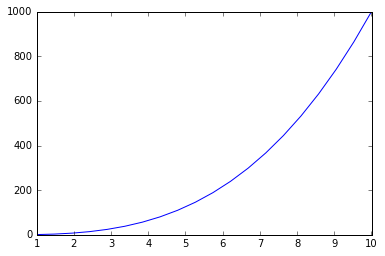

In [8]:
plot(x, y)

Так и отдельно точки:

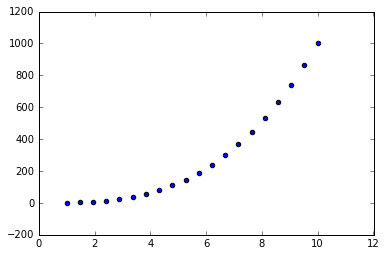

In [41]:
scatter(x, y)

И все вместе!

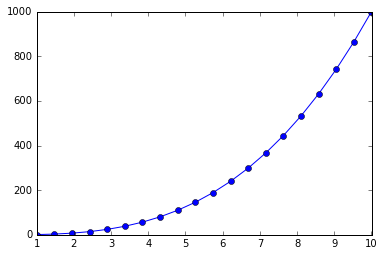

In [75]:
plot(x, y, 'bo-')

Но вернемся к реальным данным. Иногда хочется посмотреть на данные, "не отходя" от pandas:

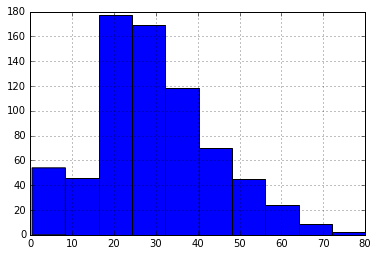

In [56]:
data['Age'].hist()

In [15]:
?pd.DataFrame.hist

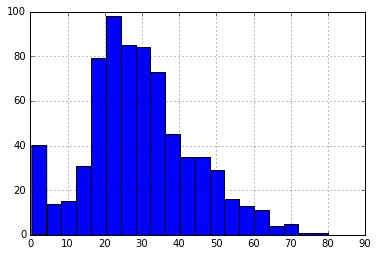

In [59]:
data['Age'].hist(bins=20)

Группировки также работают (параметр by):

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f868b10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10fa00050>], dtype=object)

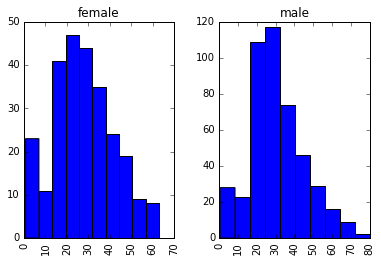

In [71]:
data['Age'].hist(by=data['Sex'])

Такие гистограммы не удобно сравнивать, хотя бы потому что они имеют разный масштаб по оси y. Испраим это:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1113f0190>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x111578990>], dtype=object)

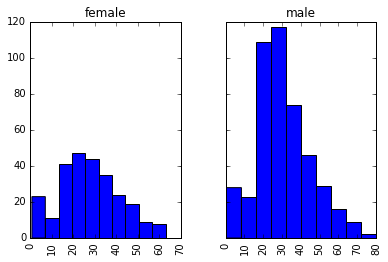

In [90]:
data['Age'].hist(by=data['Sex'], sharey=True)

Аналогично можно задать одинаковый масштаб по оси x:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d9ffdd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10e0cef10>], dtype=object)

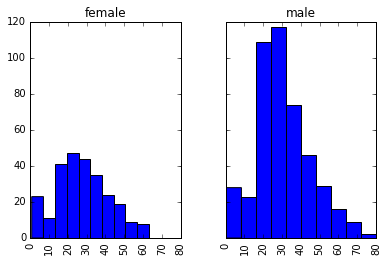

In [16]:
data['Age'].hist(by=data['Sex'], sharey=True, sharex=True)

Но все же строить более сложные графики лучше с помощью matplotlib:

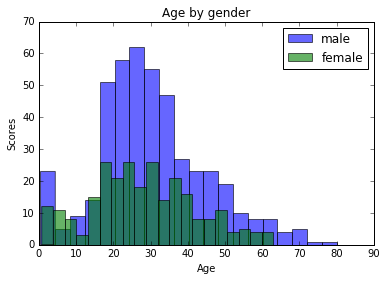

In [12]:
bins = 20
index = np.arange(bins)
male = plt.hist(data[data['Sex'] == 'male']['Age'].dropna(), bins=bins, alpha=0.6, label='male')
female = plt.hist(data[data['Sex'] == 'female']['Age'].dropna(), bins=bins, alpha=0.6, label='female')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Scores')
plt.title('Age by gender')
plt.legend()

plt.show()

Если нужно сравнить данные по процентому соотношению, можно задать параметр normed:

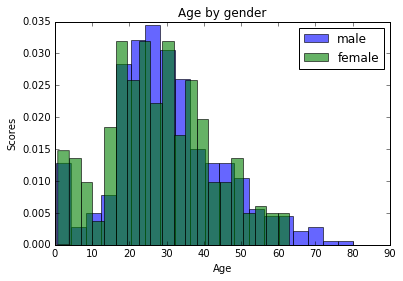

In [13]:
bins = 20
index = np.arange(bins)
male = plt.hist(data[data['Sex'] == 'male']['Age'].dropna(), bins=bins, alpha=0.6, normed=True, label='male')
male = plt.hist(data[data['Sex'] == 'female']['Age'].dropna(), bins=bins, alpha=0.6, normed=True, label='female')

plt.xlabel('Age')
plt.ylabel('Scores')
plt.title('Age by gender')
plt.legend()

plt.show()

Не забывайте, что порой играет роль как мы смотрим на данные.

![](https://pbs.twimg.com/media/Bpx6cTlCMAE38VL.jpg)